### DML DATASET 3 :- Car Insurrance Fraud Claim

### Import of  Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score,classification_report
from sklearn.metrics import roc_curve, auc,ConfusionMatrixDisplay,roc_auc_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Some Important Function 

In [3]:
def drop_columns(dataframe, columns_to_drop):
    """
    Drops specified columns from a pandas DataFrame inplace.
    Returns:
    None
    """
    dataframe.drop(columns=columns_to_drop, inplace=True) 

In [4]:
def missing_values(Dataframe):
    '''To Check the missing Values in Data  Frame'''
    Feature=[]
    missing_values=[]
    Percentage_of_Missing_Values=[]
    Matrix=pd.DataFrame()
    for i in df.columns:
        a=df[i].isnull().sum()
        if a > 0:
            b=a/len(df)*100
            missing_values.append(a)
            Feature.append(i)
            Percentage_of_Missing_Values.append(b)
    Matrix["Feature"]=Feature
    Matrix["Missing Values"]=missing_values
    Matrix["Percentage of Missing Values"]=Percentage_of_Missing_Values
    Matrix=Matrix.sort_values(by="Percentage of Missing Values", ascending=False)
    return Matrix 


In [5]:
def cat_feature(dataframe):
    '''To Check The Category column in Data frame'''
    cat=[]
    for col in dataframe.columns:
        if df[col].dtype == 'object':
            cat.append(col)
    return cat 

In [6]:
def numerical_feature(dataframe):
    num=[]
    for col in dataframe.columns:
        if dataframe[col].dtype in ['float64', 'int64']:
            num.append(col)
    return num

In [7]:
def unique_feature_values(Dataframe, columns):
    unique_values = []
    for feature in columns:
        unique_values.append((feature,Dataframe[feature].unique()))
    return unique_values


#### Adopting the KDD Methodologies
Step 1: Data Collection

Step 2: Pre-processing and Exploring the data

Step 3: Data Preparation

Step 4: Model Training

Step 5: Evaluating Model Performance

Step 6: Improving Model Performance

### Step 1: Data Collection

In [8]:
df=pd.read_csv(r"/content/gdrive/MyDrive/DMML/Car_Insurance_Claim _ dataset 3.csv")

In [9]:
df.head(2)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0


In [10]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


### Step 2: Pre-processing and Exploring the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

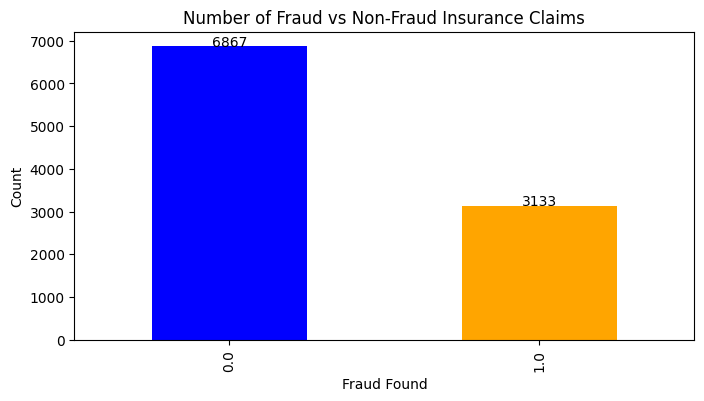

In [12]:
# Count the number of fraud cases
fraud_counts = df['OUTCOME'].value_counts()

# Create a bar plot using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
fraud_counts.plot(kind='bar', ax=ax,color=['blue','orange'])
# Add value labels to the bars
for i, v in enumerate(fraud_counts):
    ax.text(i, v + 10, str(v), color='black', ha='center')
# Set the plot title and axis labels
ax.set_title('Number of Fraud vs Non-Fraud Insurance Claims')
ax.set_xlabel('Fraud Found')
ax.set_ylabel('Count')

plt.show()


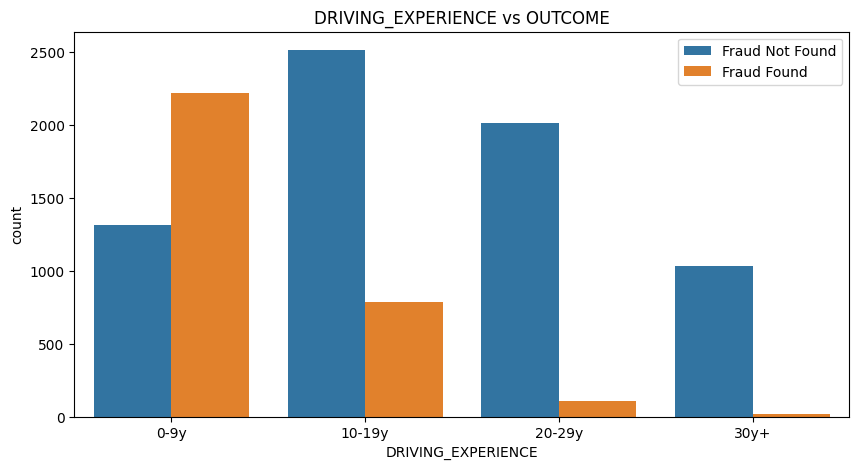

In [13]:
plt.figure(figsize=(10,5))
plt.title('DRIVING_EXPERIENCE vs OUTCOME')
sns.countplot(data=df, x ='DRIVING_EXPERIENCE', hue='OUTCOME');
plt.legend(["Fraud Not Found","Fraud Found"])


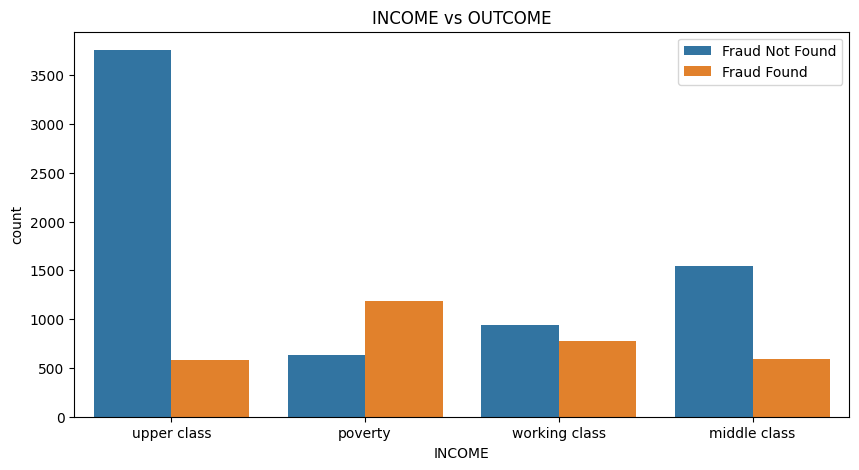

In [14]:
#poverty count are more likely to claim
plt.figure(figsize=(10,5))
plt.title('INCOME vs OUTCOME')
sns.countplot(data=df, x ='INCOME', hue='OUTCOME');
plt.legend(["Fraud Not Found","Fraud Found"])

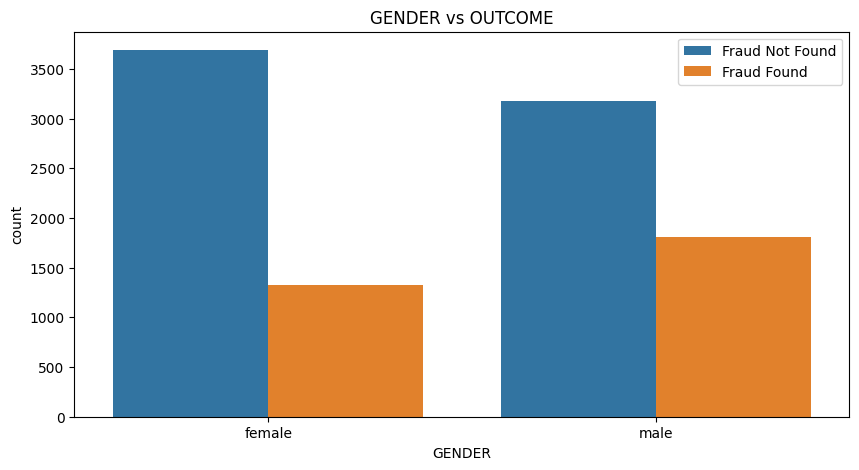

In [15]:
#men are more likely to claim for insurance compare to women
plt.figure(figsize=(10,5))
plt.title('GENDER vs OUTCOME')
sns.countplot(data=df, x ='GENDER', hue='OUTCOME');
plt.legend(["Fraud Not Found","Fraud Found"])

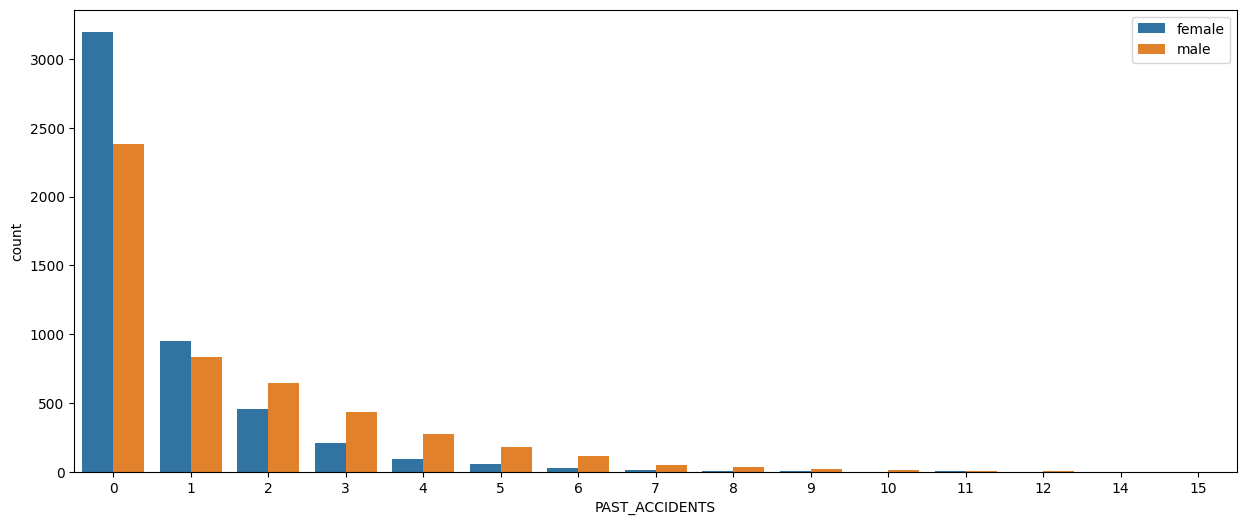

In [16]:
# number of accidents vs count is plotted to check for insights
plt.figure(figsize=(15,6))
sns.countplot(x='PAST_ACCIDENTS',data=df,hue='GENDER')
plt.legend(loc=1)

<Axes: xlabel='GENDER', ylabel='PAST_ACCIDENTS'>

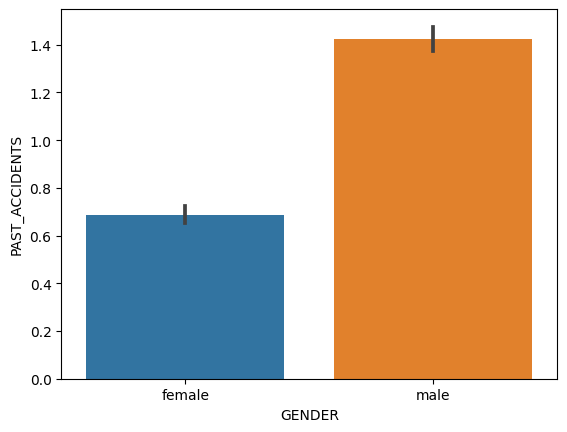

In [17]:
# accident vs gender bar plot is plotted to check the insights
# men are more likely to commit accident than women, form the graph ratio found to be close to 100:50 for men and women respectfully 

sns.barplot(x='GENDER',y='PAST_ACCIDENTS',data=df)

<Axes: xlabel='AGE', ylabel='PAST_ACCIDENTS'>

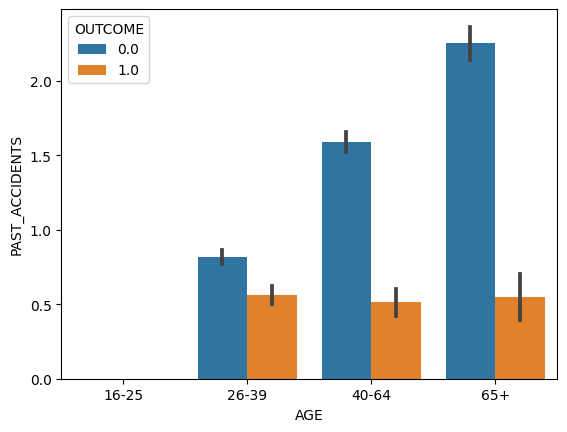

In [18]:
sns.barplot(x='AGE',y='PAST_ACCIDENTS',data=df,hue='OUTCOME',order = ['16-25','26-39','40-64','65+'])

<Axes: xlabel='GENDER', ylabel='DUIS'>

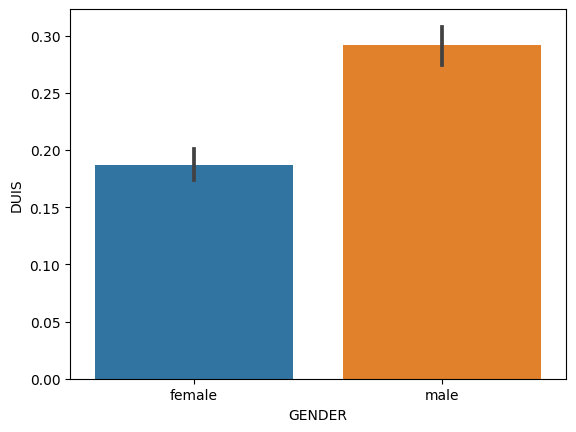

In [19]:
sns.barplot(x='GENDER',y='DUIS',data=df)

<Axes: xlabel='DRIVING_EXPERIENCE', ylabel='PAST_ACCIDENTS'>

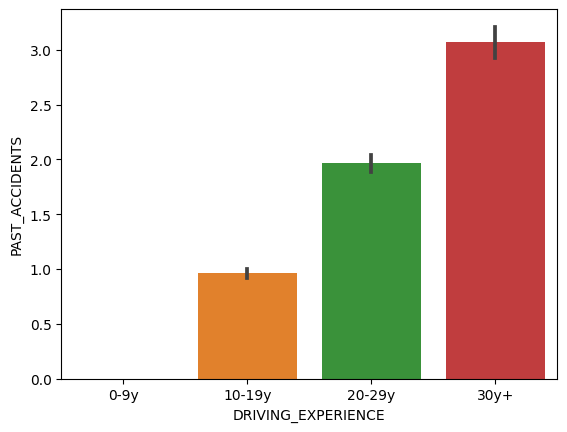

In [20]:
sns.barplot(x='DRIVING_EXPERIENCE',y='PAST_ACCIDENTS',data=df)

<Axes: xlabel='CREDIT_SCORE', ylabel='INCOME'>

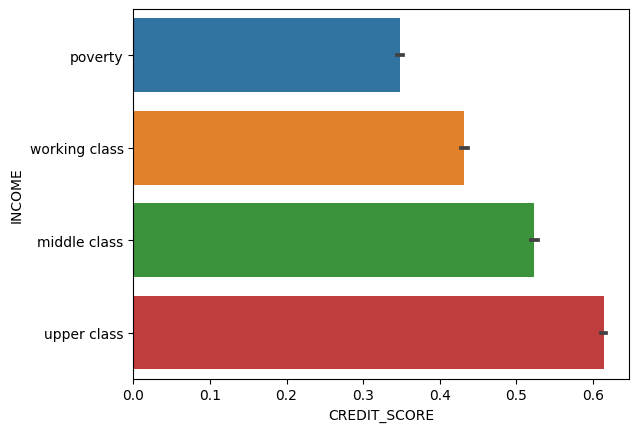

In [21]:
sns.barplot(x='CREDIT_SCORE',y='INCOME',data=df,order=["poverty",'working class','middle class',"upper class"])

## Step 3: Data Preparation

In [22]:
missing_values(df)

,Feature,Missing Values,Percentage of Missing Values
0,CREDIT_SCORE,982,9.82
1,ANNUAL_MILEAGE,957,9.57


In [23]:
# Credit score can be decided by the income class so we are trying to fill the values based on that 
column=['CREDIT_SCORE','INCOME']
# calling function to check the unique values 
unique_feature_values(df,column)

[('CREDIT_SCORE',
  array([0.62902731, 0.35775712, 0.49314579, ..., 0.47094023, 0.36418478,
         0.43522478])),
 ('INCOME',
  array(['upper class', 'poverty', 'working class', 'middle class'],
        dtype=object))]

In [24]:
'''To fill the credit card score we use income 
column catregories in that we take the four catogories median''' 

#group by income category upper class and take out median of it credit score.
upper_class_median = df[df['INCOME'] == 'upper class']['CREDIT_SCORE'].median()
#group by income category middle class and take out median of it credit score.
middle_class_median = df[df['INCOME'] == 'middle class']['CREDIT_SCORE'].median()
#group by income category poverty  and take out median of it credit score.
poverty_class_median = df[df['INCOME'] == 'poverty']['CREDIT_SCORE'].median()
#group by income category working class  and take out median of it credit score.
working_class_median = df[df['INCOME'] == 'working class']['CREDIT_SCORE'].median()

In [25]:
#by applying the  condition we group the credit score category upper class and fill the na values with the median 
upper_class_nulls = df.query("CREDIT_SCORE.isnull() and INCOME == 'upper class'")
df.loc[upper_class_nulls.index, 'CREDIT_SCORE'] =upper_class_nulls['CREDIT_SCORE'].fillna(upper_class_median)
#by applying the  condition we group the credit score category middle class  and fill the na values with the median 
middle_class_nulls = df.query("CREDIT_SCORE.isnull() and INCOME == 'middle class'")
df.loc[middle_class_nulls.index, 'CREDIT_SCORE'] =middle_class_nulls['CREDIT_SCORE'].fillna(middle_class_median)
#by applying the  condition we group the credit score category poverty  and fill the na values with the median 
poverty_class_nulls = df.query("CREDIT_SCORE.isnull() and INCOME == 'poverty'")
df.loc[poverty_class_nulls.index, 'CREDIT_SCORE'] =poverty_class_nulls['CREDIT_SCORE'].fillna(poverty_class_median)
#by applying the  condition we group the credit score category working class  and fill the na values with the median 
working_class_nulls = df.query("CREDIT_SCORE.isnull() and INCOME == 'working class'")
df.loc[working_class_nulls.index, 'CREDIT_SCORE'] =working_class_nulls['CREDIT_SCORE'].fillna(working_class_median)

In [26]:
# we fill the annual milage null values with normal median
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].median())

In [27]:
missing_values(df)

,Feature,Missing Values,Percentage of Missing Values


<Axes: >

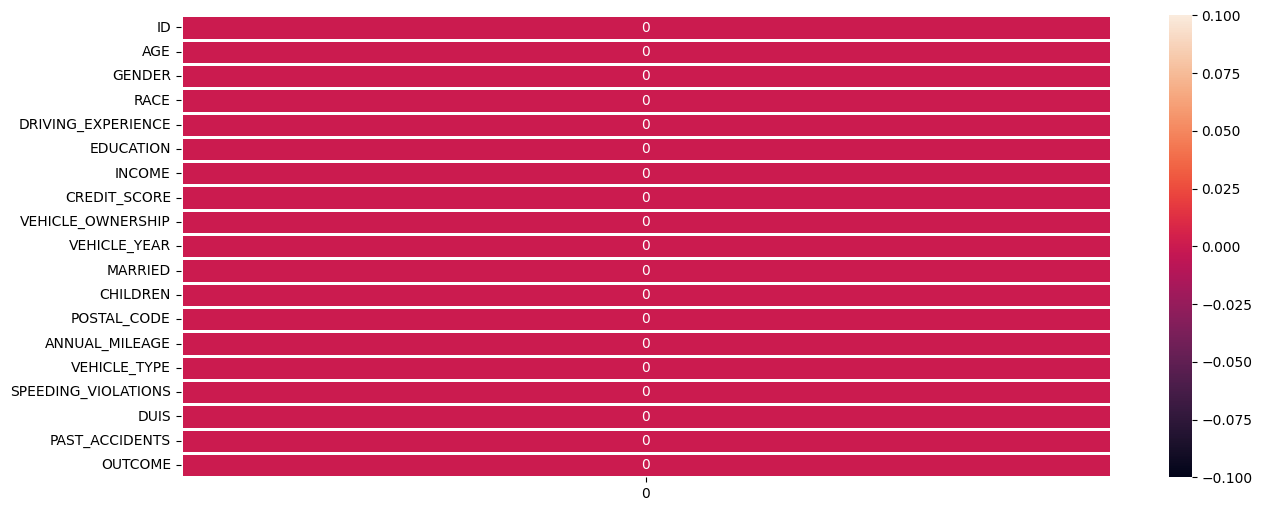

In [28]:
x=df.isnull().sum().to_frame()
plt.figure(figsize=(15,6))
sns.heatmap(x,annot=True, linewidths=2)

##### All Missing values has been handaled 

In [29]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515429,0.697000,0.498200,0.688800,19864.548400,11726.000000,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.134677,0.459578,0.500022,0.463008,18915.613855,2681.649329,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.421301,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.526747,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.616289,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [30]:
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [31]:
# Droping The Id as it is just the index
drop_columns(df,'ID')

### Box plot 

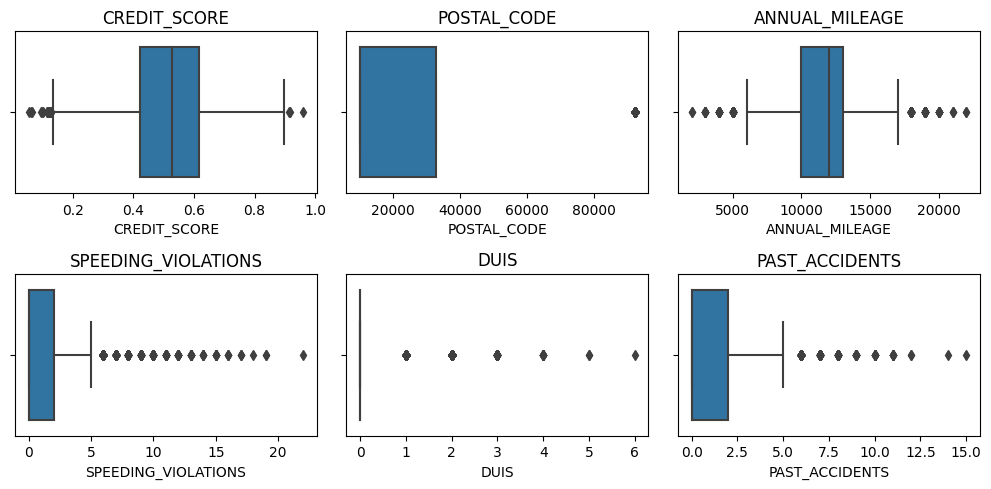

In [32]:
features = ['CREDIT_SCORE','POSTAL_CODE','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS']
plt.figure(figsize=(10,5))

for i, feature in enumerate(features):
    ax = plt.subplot(2,3, i+1)
    sns.boxplot(x=df[feature], ax=ax)
    plt.title(feature)

plt.tight_layout()
plt.show()


In [33]:
#as we have less data we trim the values seeing the box plot remove outliers 324 values removed
df=df[~(df["ANNUAL_MILEAGE"]>=17500)]
df=df[~(df["ANNUAL_MILEAGE"]<=5000)]
df=df[~(df["SPEEDING_VIOLATIONS"]>=15)]
df=df[~(df["DUIS"]>=5)]
df=df[~(df["PAST_ACCIDENTS"]>=10)]

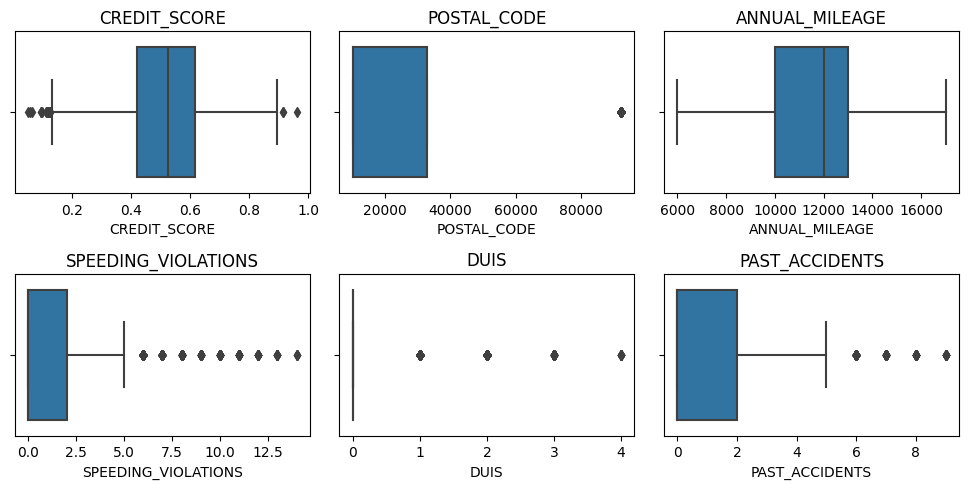

In [34]:
features = ['CREDIT_SCORE','POSTAL_CODE','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS']
plt.figure(figsize=(10,5))

for i, feature in enumerate(features):
    ax = plt.subplot(2,3, i+1)
    sns.boxplot(x=df[feature], ax=ax)
    plt.title(feature)

plt.tight_layout()
plt.show()

In [35]:
#function call for encoding 
def Encoding(D_frame, columns):

    D_frame = D_frame.replace(columns)
    D_frame.head() 

    return D_frame

In [36]:
#we replace all the qualitative data with the numeric value
clean_data   = {"AGE":                  {"16-25": 1, "26-39": 2, '40-64': 3, '65+': 4},
                "GENDER":               {"female": 0, "male": 1},
                "RACE":                 {"minority": 0, "majority": 1 },
                "DRIVING_EXPERIENCE":   {"0-9y": 1, "10-19y": 2,"20-29y":3,"30y+":4},
                "EDUCATION":            {"none": 1, "high school": 2, 'university': 3},
                "INCOME":               {"upper class": 4, "poverty": 1, "working class": 2, 'middle class':3},
          "VEHICLE_YEAR":               {"after 2015": 1, "before 2015":0},
                "VEHICLE_TYPE":         {"sedan": 0, "sports car": 1},
}
      
df = Encoding( df, clean_data)

In [37]:
df.head(2)

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,4,0,1,1,2,4,0.629027,1.0,1,0.0,1.0,10238,12000.0,0,0,0,0,0.0
1,1,1,1,1,1,1,0.357757,0.0,0,0.0,0.0,10238,16000.0,0,0,0,0,1.0


<Axes: >

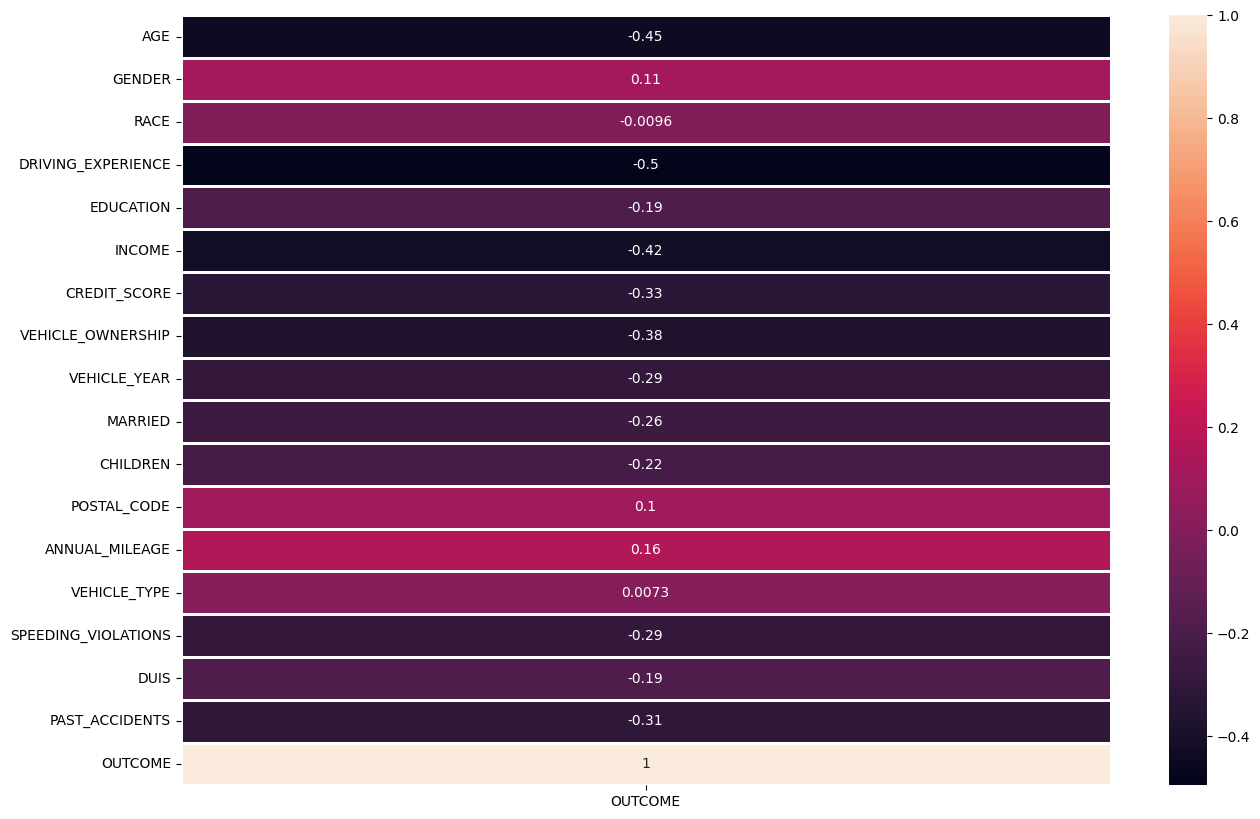

In [38]:
df.corr()['OUTCOME'].to_frame()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr()['OUTCOME'].to_frame(), annot=True, linewidths=2)

In [39]:
# droping the few columns as they are not co-related with target variable and also 
column=['POSTAL_CODE','RACE','VEHICLE_TYPE','ANNUAL_MILEAGE']
drop_columns(df,column)

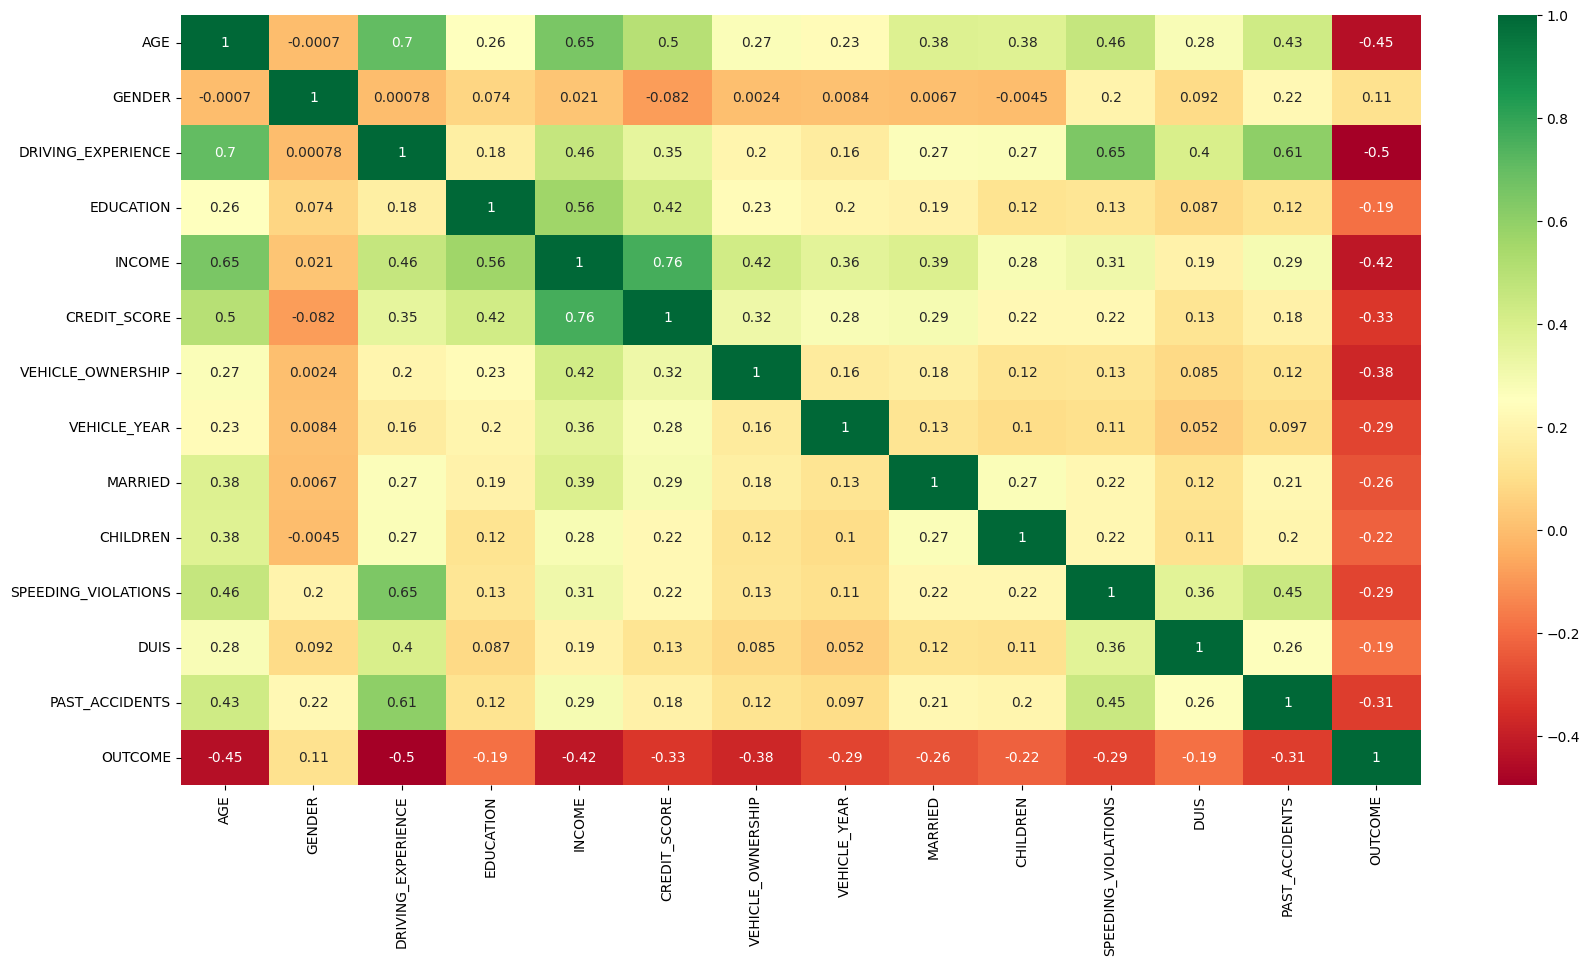

In [40]:
#we draw the correlation plot to check multicolineraity 
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,10))

#plot heatmap

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [41]:
#VIF should be less than the 10 per gausian



import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] =df.columns
  
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

                feature        VIF
0                   AGE  20.147562
1                GENDER   2.279350
2    DRIVING_EXPERIENCE  17.178547
3             EDUCATION  13.250306
4                INCOME  29.050370
5          CREDIT_SCORE  27.459441
6     VEHICLE_OWNERSHIP   4.154902
7          VEHICLE_YEAR   1.711380
8               MARRIED   2.521311
9              CHILDREN   3.847661
10  SPEEDING_VIOLATIONS   2.647102
11                 DUIS   1.446776
12       PAST_ACCIDENTS   2.416830
13              OUTCOME   1.892967


In [42]:
list_Indpndt_features = [feature for feature in df.columns if 'OUTCOME' not in feature ]
#Assumptions of Dependent and Independent Features
#The Independent features are Highly corelated with each other listing of those variables which are more than 0.5 correlating
for i in range (0,len(list_Indpndt_features)):
    for j in range (i+1 , len(list_Indpndt_features)):
        correlation  = df[list_Indpndt_features[i]].corr(df[list_Indpndt_features[j]])
        if (correlation>=0.5):
            print( list_Indpndt_features[i],' & ', list_Indpndt_features[j] , " = " , correlation)

AGE  &  DRIVING_EXPERIENCE  =  0.703351430215446
AGE  &  INCOME  =  0.6524626094735869
AGE  &  CREDIT_SCORE  =  0.5033613581067922
DRIVING_EXPERIENCE  &  SPEEDING_VIOLATIONS  =  0.6459149618332809
DRIVING_EXPERIENCE  &  PAST_ACCIDENTS  =  0.6059878387666868
EDUCATION  &  INCOME  =  0.5626068341027926
INCOME  &  CREDIT_SCORE  =  0.7606104802846949


In [43]:
# As age is highly co-related with independet variables it is better to drop 
drop_columns(df,'AGE')

In [44]:
#categorical feature 
cat_feature(df)

[]

In [45]:
#numerical feature 
num_feature=numerical_feature(df)

In [46]:
df.head(10)

,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,1,2,4,0.629027,1.0,1,0.0,1.0,0,0,0,0.0
1,1,1,1,1,0.357757,0.0,0,0.0,0.0,0,0,0,1.0
2,0,1,2,2,0.493146,1.0,0,0.0,0.0,0,0,0,0.0
3,1,1,3,2,0.206013,1.0,0,0.0,1.0,0,0,0,0.0
4,1,2,1,2,0.388366,1.0,0,0.0,0.0,2,0,1,1.0
5,0,3,2,4,0.619127,1.0,1,0.0,1.0,3,0,3,0.0
6,1,4,2,4,0.492944,0.0,1,1.0,1.0,7,0,3,0.0
7,0,1,3,2,0.468689,0.0,1,0.0,1.0,0,0,0,1.0
8,0,3,3,2,0.521815,0.0,0,1.0,0.0,0,0,0,0.0
9,0,1,2,4,0.561531,1.0,0,0.0,1.0,0,0,0,1.0


In [47]:
df.OUTCOME.value_counts()

0.0    6682
1.0    3007
Name: OUTCOME, dtype: int64

In [48]:
## Get the claimed and the unclaimed dataset 

Fraud = df[df['OUTCOME']==1]
No_Fraud = df[df['OUTCOME']==0]
print(Fraud.shape,No_Fraud.shape)

(3007, 13) (6682, 13)


In [49]:
Main_df=df.copy()

### As the size of data set is small so less chance of the overfitting and 

Step 4: Model Training

Step 5: Evaluating Model Performance

Step 6: Improving Model Performance

In [50]:
X=Main_df.drop(columns=['OUTCOME'],axis=1)
Y=Main_df['OUTCOME']
X.shape,Y.shape

((9689, 12), (9689,))

In [51]:
#we split the test and training data for modeling

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.2,  random_state=42 )
print('Length of X Train :', len(X_Train) )
print('Length of X Test  :', len(X_Test) )

Length of X Train : 7751
Length of X Test  : 1938


### Due to value difference between both the class over sampling the data set 

In [53]:

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
     

## RandomOverSampler is used  to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
     

#taking random num
ros = RandomOverSampler(random_state=42)
     

#fitting training model
X_1, Y_1 = ros.fit_resample(X, Y)
     

#check the shape of the model
#there is increase in the number of data size to balance the over all dataset
X_1.shape,Y_1.shape

((13364, 12), (13364,))

In [54]:
#splitting data in train and test
from sklearn.model_selection import train_test_split
X_Train_1, X_Test_1, Y_Train_1, Y_Test_1 = train_test_split(X_1,Y_1,test_size = 0.2,  random_state=42 )

In [55]:
#showing the shape of the dataset before and after the smote, we see the balanced train data now
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_1)))

Original dataset shape Counter({0.0: 6682, 1.0: 3007})
Resampled dataset shape Counter({0.0: 6682, 1.0: 6682})


# Model -1

### Linear Classification using sklearn library Model :-1

In [56]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
lr = LogisticRegression(max_iter=1000)
lr.fit(X_Train, Y_Train)

y_pred = lr.predict(X_Test)

lr_train_acc = accuracy_score(Y_Train, lr.predict(X_Train))
lr_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")


Training accuracy of Logistic Regression is : 0.840407689330409
Test accuracy of Logistic Regression is : 0.848297213622291
Logistic Regression cohen_kappa_score : 0.6368607625916338


## Apply Grid search cv To tune the model 

In [57]:

from sklearn.model_selection import train_test_split, GridSearchCV


# Define the logistic regression model
lr = LogisticRegression()

# Define the hyperparameters to tune and their possible values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_Train, Y_Train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validated score: ", grid_search.best_score_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best hyperparameters:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best mean cross-validated score:  0.8397617226471568


Training accuracy of Logistic Regression is : 0.840407689330409
Test accuracy of Logistic Regression is : 0.848297213622291
Logistic Regression cohen_kappa_score : 0.6368607625916338
[[1216  119]
 [ 175  428]]
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1335
         1.0       0.78      0.71      0.74       603

    accuracy                           0.85      1938
   macro avg       0.83      0.81      0.82      1938
weighted avg       0.85      0.85      0.85      1938



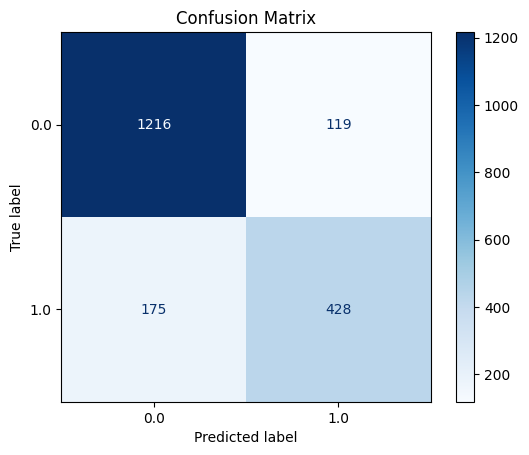

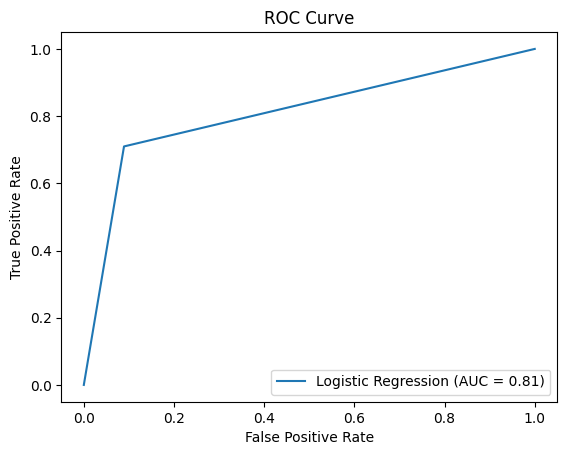

In [58]:

# Train a new logistic regression model with the best hyperparameters
lr = LogisticRegression(**grid_search.best_params_)
lr.fit(X_Train, Y_Train)

# Make predictions on the testing set
y_pred = lr.predict(X_Test)

# Compute various performance metrics
lr_train_acc = accuracy_score(Y_Train, lr.predict(X_Train))
lr_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))
# Plot confusion matrix
cm = confusion_matrix(Y_Test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
# ROC 
fpr, tpr, thresholds = roc_curve(Y_Test, y_pred, pos_label=1)
roc_auc = roc_auc_score(Y_Test, y_pred)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
disp.plot()
plt.title("ROC Curve")
plt.show()



### On balanced data set 


Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best mean cross-validated score:  0.8168560013288688
Training accuracy of Logistic Regression is : 0.8171359087082593
Test accuracy of Logistic Regression is : 0.8376356154133932
Logistic Regression cohen_kappa_score : 0.6750015408320493
[[1077  235]
 [ 199 1162]]
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      1312
         1.0       0.83      0.85      0.84      1361

    accuracy                           0.84      2673
   macro avg       0.84      0.84      0.84      2673
weighted avg       0.84      0.84      0.84      2673



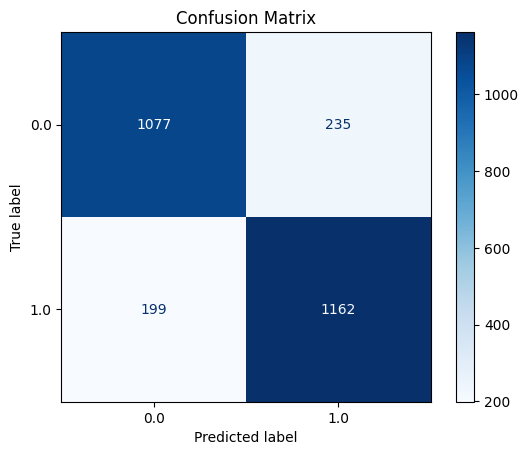

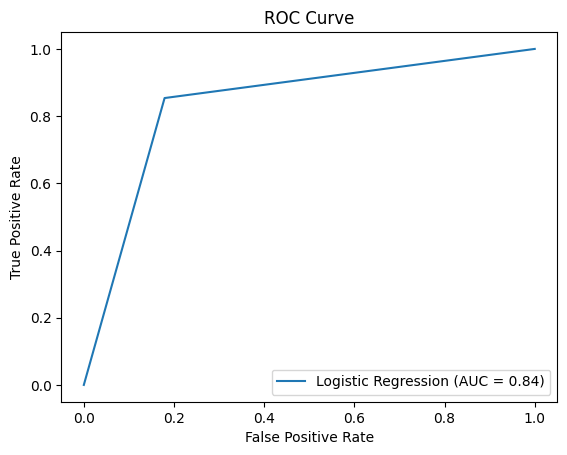

In [59]:

from sklearn.model_selection import train_test_split, GridSearchCV



# Define the logistic regression model
lr = LogisticRegression(max_iter=1000)

# Define the hyperparameters to tune and their possible values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_Train_1, Y_Train_1)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validated score: ", grid_search.best_score_)



# Train a new logistic regression model with the best hyperparameters
lr = LogisticRegression(**grid_search.best_params_)
lr.fit(X_Train_1, Y_Train_1)

# Make predictions on the testing set
y_pred = lr.predict(X_Test_1)

# Compute various performance metrics
lr_train_acc = accuracy_score(Y_Train_1, lr.predict(X_Train_1))
lr_test_acc = accuracy_score(Y_Test_1, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred)

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")
print(confusion_matrix(Y_Test_1, y_pred))
print(classification_report(Y_Test_1, y_pred))

cm = confusion_matrix(Y_Test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

fpr, tpr, thresholds = roc_curve(Y_Test_1, y_pred, pos_label=1)
roc_auc = roc_auc_score(Y_Test_1, y_pred)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
disp.plot()
plt.title("ROC Curve")
plt.show()



# Model :-2  Linear Classification Using Stats Module 

In [62]:
import statsmodels.api as sm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

# Add a constant term to the independent variable matrix to allow statsmodels to calculate the intercept
x_train = sm.add_constant(x_train)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()

# Make predictions on the testing set
x_test = sm.add_constant(x_test)
y_pred = result.predict(x_test)

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy and other metrics
train_acc = accuracy_score(y_train, (result.predict(x_train) > 0.5).astype(int))
test_acc = accuracy_score(y_test, y_pred_binary)
cohen_kappa = cohen_kappa_score(y_test, y_pred_binary)

print(f"Training accuracy of Logistic Regression is : {train_acc}")
print(f"Test accuracy of Logistic Regression is : {test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")

print(classification_report(y_test, y_pred_binary))



Optimization terminated successfully.
         Current function value: 0.368606
         Iterations 7
Training accuracy of Logistic Regression is : 0.8401651430256561
Test accuracy of Logistic Regression is : 0.8421052631578947
Logistic Regression cohen_kappa_score : 0.6244132129373089
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      2027
         1.0       0.74      0.73      0.74       880

    accuracy                           0.84      2907
   macro avg       0.81      0.81      0.81      2907
weighted avg       0.84      0.84      0.84      2907



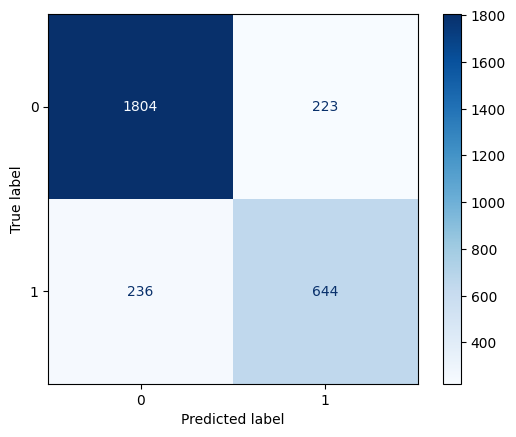

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# compute binary predictions
y_pred_binary = (y_pred >= 0.5).astype(int)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap=plt.cm.Blues, values_format='.5g')

plt.show()


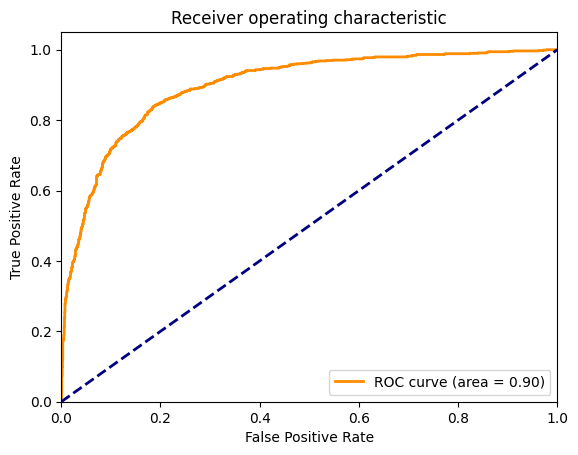

In [64]:
from sklearn.metrics import roc_curve, auc
# Compute the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### On balanced data set 

In [65]:
import statsmodels.api as sm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




# Add a constant term to the independent variable matrix to allow statsmodels to calculate the intercept
X_Train_1 = sm.add_constant(X_Train_1)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(Y_Train_1, X_Train_1)
result = logit_model.fit()

# Make predictions on the testing set
X_Test_1 = sm.add_constant(X_Test_1)
y_pred = result.predict(X_Test_1)

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy and other metrics
train_acc = accuracy_score(Y_Train_1, (result.predict(X_Train_1) > 0.5).astype(int))
test_acc = accuracy_score(Y_Test_1, y_pred_binary)
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred_binary)

print(f"Training accuracy of Logistic Regression is : {train_acc}")
print(f"Test accuracy of Logistic Regression is : {test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")

print(classification_report(Y_Test_1, y_pred_binary))


Optimization terminated successfully.
         Current function value: 0.411351
         Iterations 7
Training accuracy of Logistic Regression is : 0.8171359087082593
Test accuracy of Logistic Regression is : 0.8376356154133932
Logistic Regression cohen_kappa_score : 0.6750015408320493
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      1312
         1.0       0.83      0.85      0.84      1361

    accuracy                           0.84      2673
   macro avg       0.84      0.84      0.84      2673
weighted avg       0.84      0.84      0.84      2673



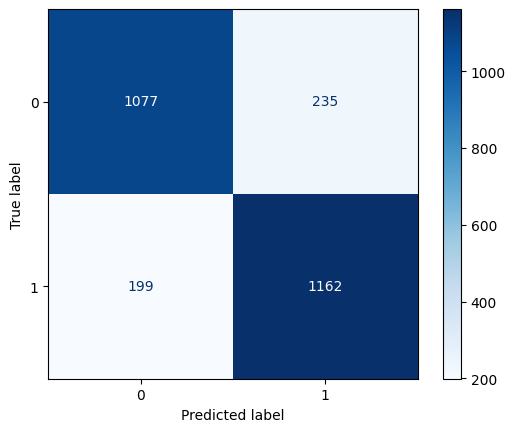

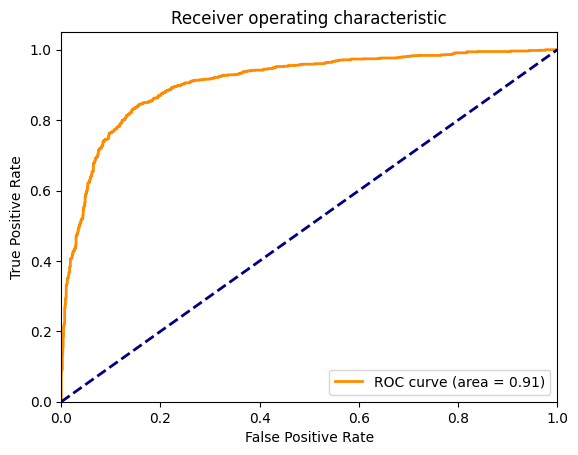

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# compute binary predictions
y_pred_binary = (y_pred >= 0.5).astype(int)

# create confusion matrix
cm = confusion_matrix(Y_Test_1, y_pred_binary)

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap=plt.cm.Blues, values_format='.5g')

plt.show()
from sklearn.metrics import roc_curve, auc
# Compute the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(Y_Test_1, y_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#  Model -3  (Random forest )

 ## Random forest  from SCKIT Learn 

In [67]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()
rand_clf.fit(X_Train, Y_Train)

y_pred = rand_clf.predict(X_Test)

Training accuracy of Random Forest is : 0.8840149658108631
Test accuracy of Random Forest is : 0.8307533539731682
RF cohen_kappa_score : 0.5952427343961917
[[1198  137]
 [ 191  412]]
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1335
         1.0       0.75      0.68      0.72       603

    accuracy                           0.83      1938
   macro avg       0.81      0.79      0.80      1938
weighted avg       0.83      0.83      0.83      1938



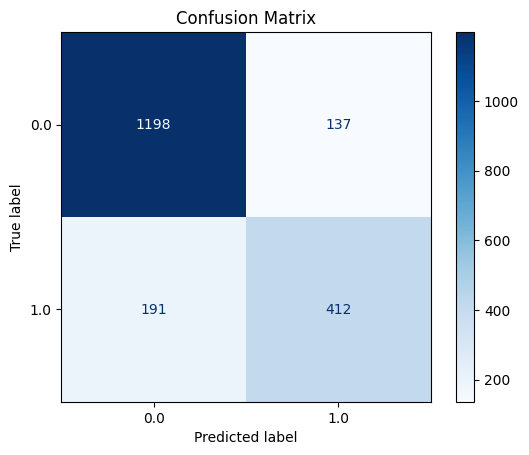

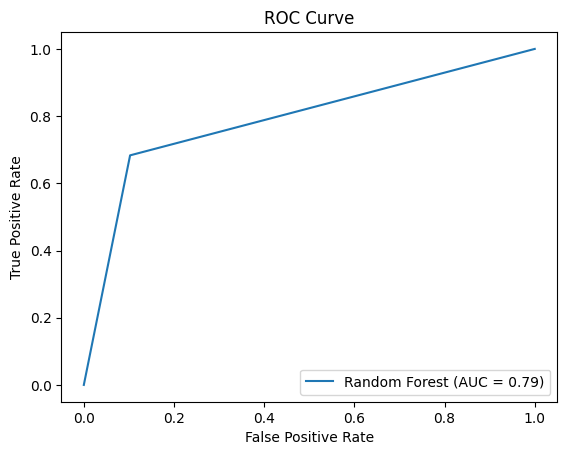

In [68]:

# Define the model
best_rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
best_rfc.fit(X_Train, Y_Train)

# Make predictions on the testing set
y_pred = best_rfc.predict(X_Test)

# Calculate accuracy and other metrics
rand_clf_train_acc = accuracy_score(Y_Train, best_rfc.predict(X_Train))
rand_clf_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")
print(f"RF cohen_kappa_score : {cohen_kappa}")

print(confusion_matrix(Y_Test, y_pred))

print(classification_report(Y_Test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(Y_Test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rfc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_Test, y_pred, pos_label=1)
roc_auc = roc_auc_score(Y_Test, y_pred)



disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
disp.plot()
plt.title("ROC Curve")
plt.show()


## On balnced data set 

Training accuracy of Random Forest is : 0.9959779253577775
Test accuracy of Random Forest is : 0.8974934530490086
RF cohen_kappa_score : 0.7947772004929369
[[1150  162]
 [ 112 1249]]
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89      1312
         1.0       0.89      0.92      0.90      1361

    accuracy                           0.90      2673
   macro avg       0.90      0.90      0.90      2673
weighted avg       0.90      0.90      0.90      2673



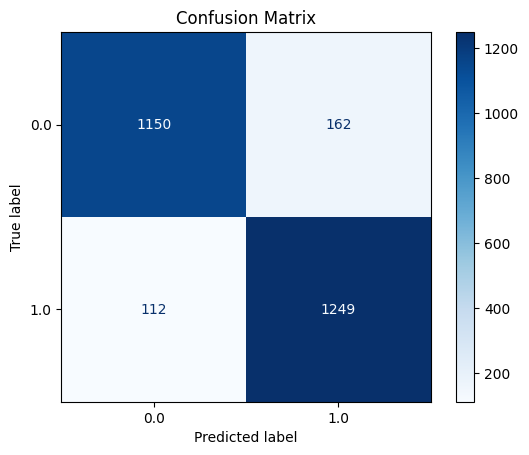

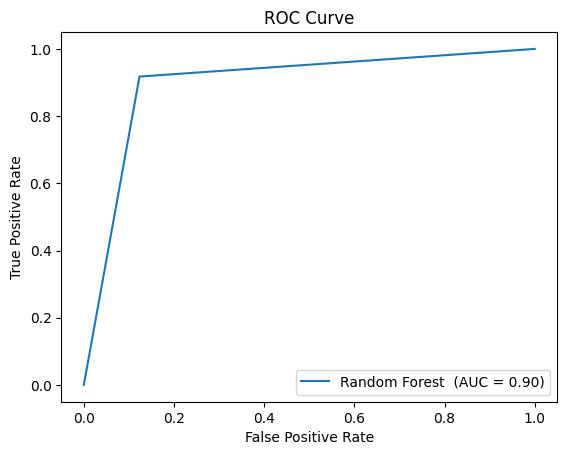

In [69]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()
rand_clf.fit(X_Train_1, Y_Train_1)

y_pred_1= rand_clf.predict(X_Test_1)

rand_clf_train_acc = accuracy_score(Y_Train_1, rand_clf.predict(X_Train_1))
rand_clf_test_acc = accuracy_score(Y_Test_1, y_pred_1)
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred_1)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")
print(f"RF cohen_kappa_score : {cohen_kappa}")

print(confusion_matrix(Y_Test_1, y_pred_1))

print(classification_report(Y_Test_1, y_pred_1))
# Plot confusion matrix
cm = confusion_matrix(Y_Test_1, y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rfc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_Test_1, y_pred_1, pos_label=1)
roc_auc = roc_auc_score(Y_Test_1, y_pred_1)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest ')
disp.plot()
plt.title("ROC Curve")
plt.show()


In [70]:
importances = rand_clf.feature_importances_

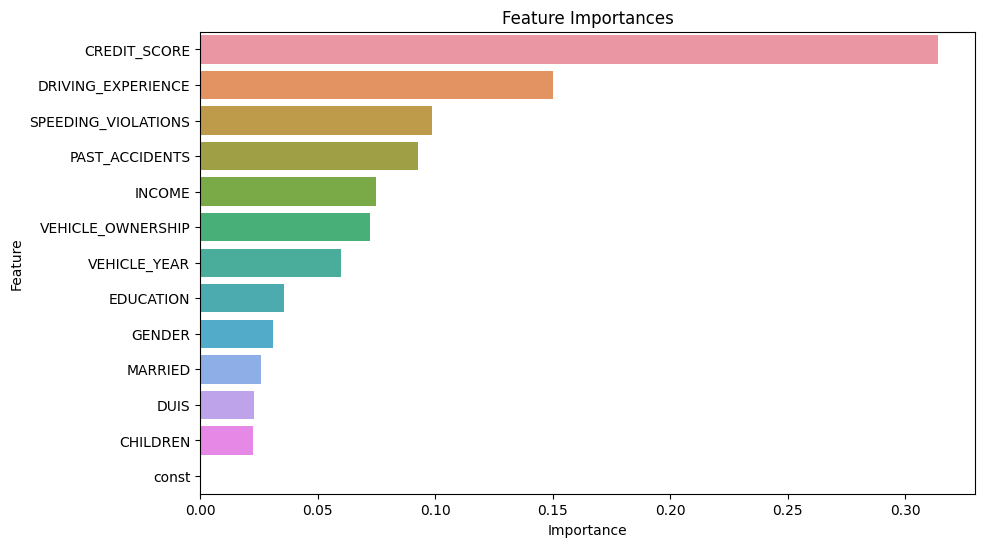

In [71]:
feature_importances = pd.DataFrame({'feature': X_Train_1.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Model -4 

##  Random Forest Classification using   h2o librery 

### On unbalaced data 

In [72]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697898 sha256=6c30aca28a9f0051dd611793f6f592b31f534141a41ed582521c7b835fa46830
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o


In [73]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score

h2o.init()
train_df = h2o.H2OFrame(pd.concat([X_Train, Y_Train], axis=1))
test_df = h2o.H2OFrame(pd.concat([X_Test, Y_Test], axis=1))

train_df['OUTCOME']=train_df['OUTCOME'].asfactor()
feature=train_df.columns
feature.remove('OUTCOME')
target='OUTCOME'
rfc = H2ORandomForestEstimator()
rfc.train(x=feature,y=target,training_frame=train_df)
y_pred = rfc.predict(test_df)

y_pred = rfc.predict(test_df)
y_pred_1 = y_pred['predict'].as_data_frame().values.flatten()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp840bx8x1
  JVM stdout: /tmp/tmp840bx8x1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp840bx8x1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_ihekvw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [74]:
rfc_train_acc = rfc.model_performance(train_df).accuracy()[0][1]
rfc_test_acc = rfc.model_performance(test_df).accuracy()[0][1]
cohen_kappa = cohen_kappa_score(Y_Test, y_pred_1)
print(f"Training accuracy of Random Forest is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest is : {rfc_test_acc}")
print(f"Random Forest cohen_kappa_score : {cohen_kappa}")


Training accuracy of Random Forest is : 0.9930331570119985
Test accuracy of Random Forest is : 0.8168214654282766
Random Forest cohen_kappa_score : 0.5721806820157833


In [75]:
# Convert H2OFrame to pandas DataFrame
y_true = test_df['OUTCOME'].as_data_frame().values.flatten()

# Convert H2OFrame to pandas DataFrame
y_pred = rfc.predict(test_df)['predict'].as_data_frame().values.flatten()

# Compute and print confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion matrix:\n', cm)

# Compute and print classification report
cr = classification_report(y_true, y_pred)
print('Classification report:\n', cr)

# Compute and print Cohen's kappa score
kappa = cohen_kappa_score(y_true, y_pred)
print('Cohen\'s kappa score:', kappa)


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion matrix:
 [[1148  187]
 [ 171  432]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1335
           1       0.70      0.72      0.71       603

    accuracy                           0.82      1938
   macro avg       0.78      0.79      0.79      1938
weighted avg       0.82      0.82      0.82      1938

Cohen's kappa score: 0.5721806820157833


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


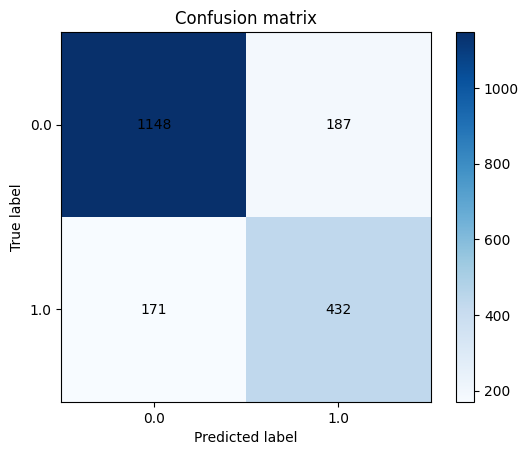

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert predictions and true labels to numpy arrays
y_true = Y_Test.values
y_pred = rfc.predict(test_df)['predict'].as_data_frame().values.flatten()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Confusion matrix')
plt.colorbar(im)
tick_marks = np.arange(len(set(y_true)))
plt.xticks(tick_marks, sorted(set(y_true)))
plt.yticks(tick_marks, sorted(set(y_true)))
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add count of each cell to the plot
for i in range(len(cm)):
    for j in range(len(cm)):
        ax.text(j, i, str(cm[i][j]), ha='center', va='center', color='black')

plt.show()


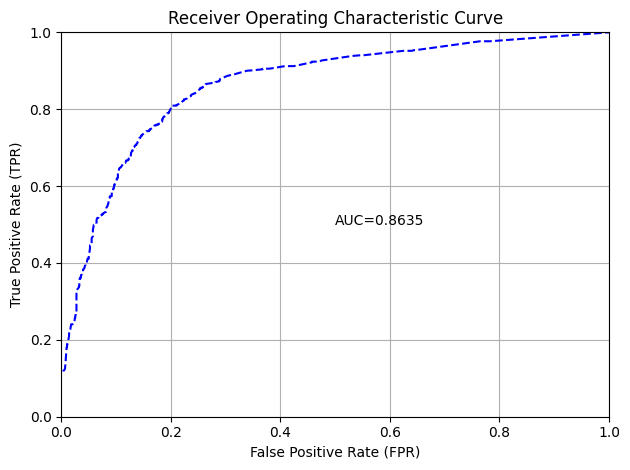

([0.003745318352059925, 0.003745318352059925, 0.0052434456928838954, 0.006741573033707865, 0.00749063670411985, 0.009737827715355805, 0.010486891385767791, 0.010486891385767791, 0.010486891385767791, 0.011235955056179775, 0.011235955056179775, 0.011235955056179775, 0.01198501872659176, 0.014232209737827715, 0.014232209737827715, 0.014232209737827715, 0.014232209737827715, 0.014232209737827715, 0.014232209737827715, 0.0149812734082397, 0.015730337078651686, 0.01647940074906367, 0.017977528089887642, 0.018726591760299626, 0.01947565543071161, 0.020224719101123594, 0.020973782771535582, 0.023220973782771534, 0.02397003745318352, 0.02397003745318352, 0.024719101123595506, 0.02546816479400749, 0.02546816479400749, 0.02546816479400749, 0.02546816479400749, 0.026217228464419477, 0.026217228464419477, 0.026217228464419477, 0.02696629213483146, 0.02696629213483146, 0.027715355805243445, 0.027715355805243445, 0.027715355805243445, 0.027715355805243445, 0.027715355805243445, 0.027715355805243445,

In [77]:
print(rfc.model_performance(test_data=test_df).plot())



### b. applying on balanced data set 

In [78]:

h2o.init()
train_df = h2o.H2OFrame(pd.concat([X_Train_1, Y_Train_1], axis=1))
test_df = h2o.H2OFrame(pd.concat([X_Test_1, Y_Test_1], axis=1))

train_df['OUTCOME']=train_df['OUTCOME'].asfactor()
feature=train_df.columns
feature.remove('OUTCOME')
target='OUTCOME'
rfc = H2ORandomForestEstimator()
rfc.train(x=feature,y=target,training_frame=train_df)
y_pred = rfc.predict(test_df)
y_pred = rfc.predict(test_df)
y_pred_1 = y_pred['predict'].as_data_frame().values.flatten()

X_1= X_1
Y_1= Y_1
X_Train_1, X_Test_1, Y_Train_1, Y_Test_1 = train_test_split(X_1,Y_1,test_size = 0.2,  random_state=42)
X_Train_1.shape, X_Test_1.shape, Y_Train_1.shape, Y_Test_1.shape

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,30 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_ihekvw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.165 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [const]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


((10691, 12), (2673, 12), (10691,), (2673,))

In [79]:
rfc_train_acc = rfc.model_performance(train_df).accuracy()[0][1]
rfc_test_acc = rfc.model_performance(test_df).accuracy()[0][1]
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred_1)
print(f"Training accuracy of Random Forest is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest is : {rfc_test_acc}")
# Convert H2OFrame to pandas DataFrame
y_true = test_df['OUTCOME'].as_data_frame().values.flatten()

# Convert H2OFrame to pandas DataFrame
y_pred = rfc.predict(test_df)['predict'].as_data_frame().values.flatten()

# Compute and print confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion matrix:\n', cm)

# Compute and print classification report
cr = classification_report(y_true, y_pred)
print('Classification report:\n', cr)

# Compute and print Cohen's kappa score
kappa = cohen_kappa_score(y_true, y_pred)
print('Cohen\'s kappa score:', kappa)


Training accuracy of Random Forest is : 0.9937330464876999
Test accuracy of Random Forest is : 0.9031051253273475
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion matrix:
 [[1167  145]
 [ 123 1238]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1312
           1       0.90      0.91      0.90      1361

    accuracy                           0.90      2673
   macro avg       0.90      0.90      0.90      2673
weighted avg       0.90      0.90      0.90      2673

Cohen's kappa score: 0.7993482692498374


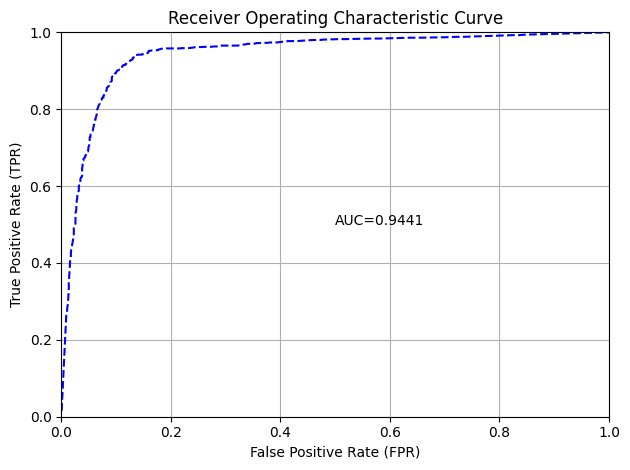

([0.0007621951219512195, 0.0007621951219512195, 0.009146341463414634, 0.010670731707317074, 0.010670731707317074, 0.011432926829268292, 0.012195121951219513, 0.012195121951219513, 0.012957317073170731, 0.012957317073170731, 0.012957317073170731, 0.013719512195121951, 0.013719512195121951, 0.013719512195121951, 0.013719512195121951, 0.013719512195121951, 0.01600609756097561, 0.01600609756097561, 0.01600609756097561, 0.01600609756097561, 0.01676829268292683, 0.01753048780487805, 0.01753048780487805, 0.01753048780487805, 0.01753048780487805, 0.018292682926829267, 0.019054878048780487, 0.019817073170731708, 0.022865853658536585, 0.022865853658536585, 0.022865853658536585, 0.022865853658536585, 0.022865853658536585, 0.022865853658536585, 0.024390243902439025, 0.025914634146341462, 0.025914634146341462, 0.025914634146341462, 0.025914634146341462, 0.025914634146341462, 0.025914634146341462, 0.025914634146341462, 0.026676829268292682, 0.027439024390243903, 0.027439024390243903, 0.0274390243902

In [80]:
print(rfc.model_performance(test_data=test_df).plot())


In [81]:
h2o.shutdown()

H2O session _sid_a614 closed.


<ipython-input-81-1edf85295eae>:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


# Model -5

## XG boost with tuning from grid search cv

In [82]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define XGBClassifier model
xgb = XGBClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    
}

# Define GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5)

# Fit GridSearchCV on training data
grid_search.fit(X_Train, Y_Train)
# Print best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [83]:
# Get best estimator and predict on test data
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_Test)

# Compute train and test accuracy and Cohen's kappa score
xgb_train_acc = accuracy_score(Y_Train, best_xgb.predict(X_Train))
xgb_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

# Print results
print(f"Training accuracy of tuned XGBoost is: {xgb_train_acc}")
print(f"Test accuracy of tuned XGBoost is: {xgb_test_acc}")
print(f"Tuned XGBoost Cohen's kappa score: {cohen_kappa}")

# Print confusion matrix and classification report
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

Training accuracy of tuned XGBoost is: 0.8472455167075216
Test accuracy of tuned XGBoost is: 0.8441692466460269
Tuned XGBoost Cohen's kappa score: 0.6300858175419702
[[1203  132]
 [ 170  433]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1335
         1.0       0.77      0.72      0.74       603

    accuracy                           0.84      1938
   macro avg       0.82      0.81      0.81      1938
weighted avg       0.84      0.84      0.84      1938



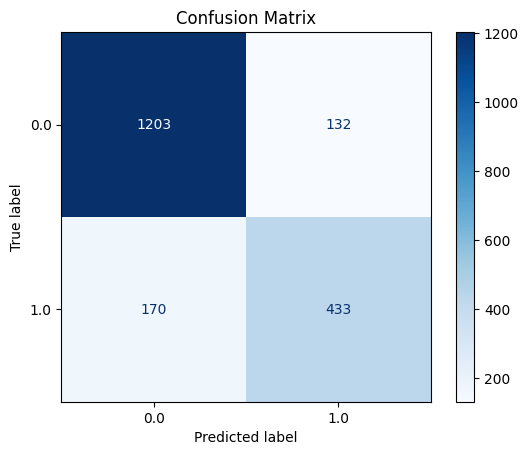

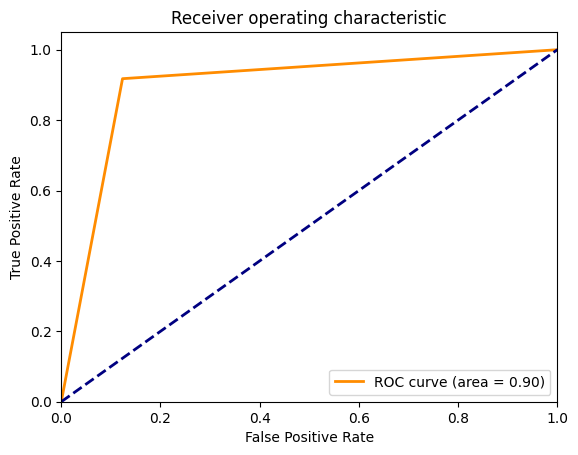

In [85]:

# Plot confusion matrix
cm = confusion_matrix(Y_Test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## On Over Sampled data

In [86]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define XGBClassifier model
xgb = XGBClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Define GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5)

# Fit GridSearchCV on training data
grid_search.fit(X_Train_1, Y_Train_1)
# Print best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 1}


In [87]:
# Get best estimator and predict on test data
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_Test_1)

# Compute train and test accuracy and Cohen's kappa score
xgb_train_acc = accuracy_score(Y_Train_1, best_xgb.predict(X_Train_1))
xgb_test_acc = accuracy_score(Y_Test_1, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred)

# Print results
print(f"Training accuracy of tuned XGBoost is: {xgb_train_acc}")
print(f"Test accuracy of tuned XGBoost is: {xgb_test_acc}")
print(f"Tuned XGBoost Cohen's kappa score: {cohen_kappa}")

# Print confusion matrix and classification report
print(confusion_matrix(Y_Test_1, y_pred))
print(classification_report(Y_Test_1, y_pred))

Training accuracy of tuned XGBoost is: 0.918997287438032
Test accuracy of tuned XGBoost is: 0.8698092031425365
Tuned XGBoost Cohen's kappa score: 0.739402157164869
[[1120  192]
 [ 156 1205]]
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87      1312
         1.0       0.86      0.89      0.87      1361

    accuracy                           0.87      2673
   macro avg       0.87      0.87      0.87      2673
weighted avg       0.87      0.87      0.87      2673



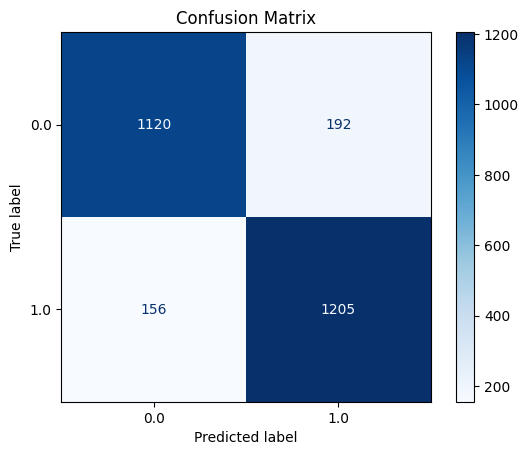

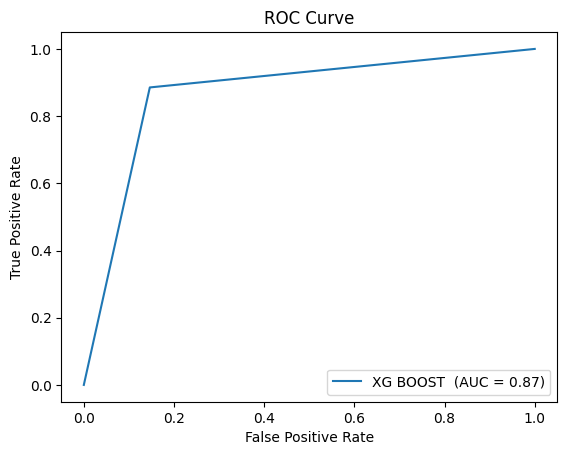

In [88]:

# Plot confusion matrix
cm = confusion_matrix(Y_Test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

fpr, tpr, thresholds = roc_curve(Y_Test_1, y_pred, pos_label=1)
roc_auc = roc_auc_score(Y_Test_1, y_pred)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='XG BOOST ')
disp.plot()
plt.title("ROC Curve")
plt.show()

## Summary Of the model 

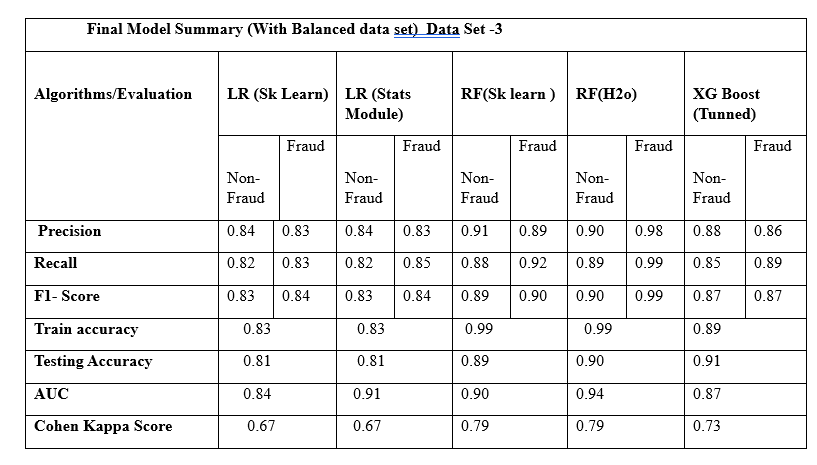

# End Of the code 